<a href="https://colab.research.google.com/github/LoniQin/deep_learning_notebooks/blob/master/tensorflow/HousePricePredictorWithCustomTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [155]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Load and preprocess data

In [156]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

In [157]:
train = np.concatenate((x_train, y_train), axis=1)
test = np.concatenate((x_test, y_test), axis=1)
all = np.concatenate((train, test), axis=0)
scaler = MinMaxScaler((0, 1.0))
all_scaled = scaler.fit_transform(all.reshape((all.shape[0] * all.shape[1], 1))).reshape((all.shape[0], all.shape[1]))

In [158]:
x_train_scaled = all_scaled[:x_train.shape[0], :x_train.shape[1]]
y_train_scaled = all_scaled[:x_train.shape[0], x_train.shape[1]:]
x_test_scaled = all_scaled[x_train.shape[0]:, :x_train.shape[1]]
y_test_scaled = all_scaled[x_train.shape[0]:, x_train.shape[1]:]

## Create Nerual Network

In [159]:
def mean_square_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

In [160]:
model = keras.models.Sequential([
    keras.layers.InputLayer((13, )),
    keras.layers.Dense(32),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss=mean_square_error)
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


## Train the Nerual Network

In [161]:
def train(model, x, y, loss, epochs=1, learning_rate = 0.1, batch_size=32):
  variables = model.variables
  steps_per_epoch = x.shape[0] // batch_size
  actual_learning_rate = learning_rate / float(steps_per_epoch)
  if x.shape[0] % batch_size > 0:
    steps_per_epoch += 1
  losses = []
  for epoch in range(epochs):
    total_loss = tf.Variable(0.0)
    for step in range(steps_per_epoch):
      indices = np.random.choice(x.shape[0], batch_size)
      x_batch = x[indices]
      y_batch = y[indices]
      with tf.GradientTape() as t:
        current_loss = loss(model(x_batch), y_batch)
      gradients = t.gradient(current_loss, variables)
      total_loss.assign_add(current_loss)
      for i in range(len(variables)):
          variables[i].assign_sub(actual_learning_rate * gradients[i])
    losses.append(total_loss)
  return losses

In [162]:
losses = train(model, x_train_scaled, y_train_scaled, mean_square_error, epochs=500, learning_rate=0.1)

## Plot the learning curve

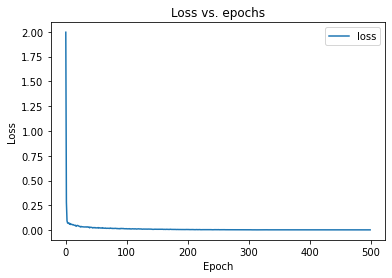

In [163]:
plt.plot(losses, label='loss')
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

## Predict data

In [164]:
y_test_predicted = scaler.inverse_transform(model.predict(x_test_scaled))

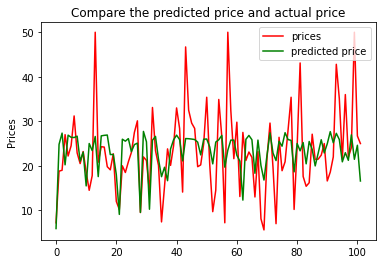

In [165]:
fig, ax = plt.subplots()
x = np.arange(y_test.shape[0])
ax.plot(y_test, label='prices', color='r')
ax.plot(y_test_predicted, label='predicted price', color='g')
ax.set_ylabel('Prices')
ax.set_title("Compare the predicted price and actual price")
ax.legend()